In [1]:
name1= "\u0930\u094b\u0936\u0928 \u0915\u0941\u092e\u093e\u0930 \u092f\u093e\u0926\u0935"
name2= "\u0935\u0948\u0936\u093E\u0932\u0940 \u0907\u0902\u0917\u0933\u0947"
print("The Assignment-5(Association Rule Learning) is done by {0} under the guidance of {1}.".format(name1,name2))

The Assignment-5(Association Rule Learning) is done by रोशन कुमार यादव under the guidance of वैशाली इंगळे.


In [3]:
pip install mlxtend networkx

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
df=pd.read_csv("C:/Users/AJAY ROSHAN YADAV/Downloads/Market_Basket_Optimisation.csv",header=None)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f"Number of transactions: {df.shape[0]}")
print(f"Number of items: {df.shape[1]}")

Number of transactions: 7501
Number of items: 20


In [8]:
df.fillna('', inplace=True)
transactions = []
for i in range(df.shape[0]):
    transaction = []
    for j in range(df.shape[1]):
        if (str(df.values[i, j]) != ''):
            transaction.append(str(df.values[i, j]))
            
    transactions.append(transaction)
for idx, t in enumerate(transactions[:5]):
    print(f"Transaction {idx+1}: {t}")

Transaction 1: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
Transaction 2: ['burgers', 'meatballs', 'eggs']
Transaction 3: ['chutney']
Transaction 4: ['turkey', 'avocado']
Transaction 5: ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [9]:
te = TransactionEncoder()
x = te.fit_transform(transactions) 
dff = pd.DataFrame(x, columns = te.columns_)
dff.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
freq_itemset = apriori(dff, min_support = 0.03, use_colnames = True)
freq_itemset.head(20)

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [17]:
min_support = 0.003
frequent_itemsets = apriori(dff, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print(f"\nFrequent itemsets (support >= {min_support}):")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
print(f"\nTotal number of association rules generated: {len(rules)}")
print("\nSample of generated rules:")
print(rules.head())



Frequent itemsets (support >= 0.003):
     support             itemsets  length
69  0.238368      (mineral water)       1
34  0.179709               (eggs)       1
96  0.174110          (spaghetti)       1
40  0.170911       (french fries)       1
23  0.163845          (chocolate)       1
51  0.132116          (green tea)       1
68  0.129583               (milk)       1
52  0.098254        (ground beef)       1
46  0.095321  (frozen vegetables)       1
78  0.095054           (pancakes)       1

Total number of association rules generated: 1362

Sample of generated rules:
  antecedents     consequents  antecedent support  consequent support  \
0   (almonds)       (burgers)            0.020397            0.087188   
1   (almonds)     (chocolate)            0.020397            0.163845   
2   (almonds)          (eggs)            0.020397            0.179709   
3   (almonds)  (french fries)            0.020397            0.170911   
4   (almonds)     (green tea)            0.020397      

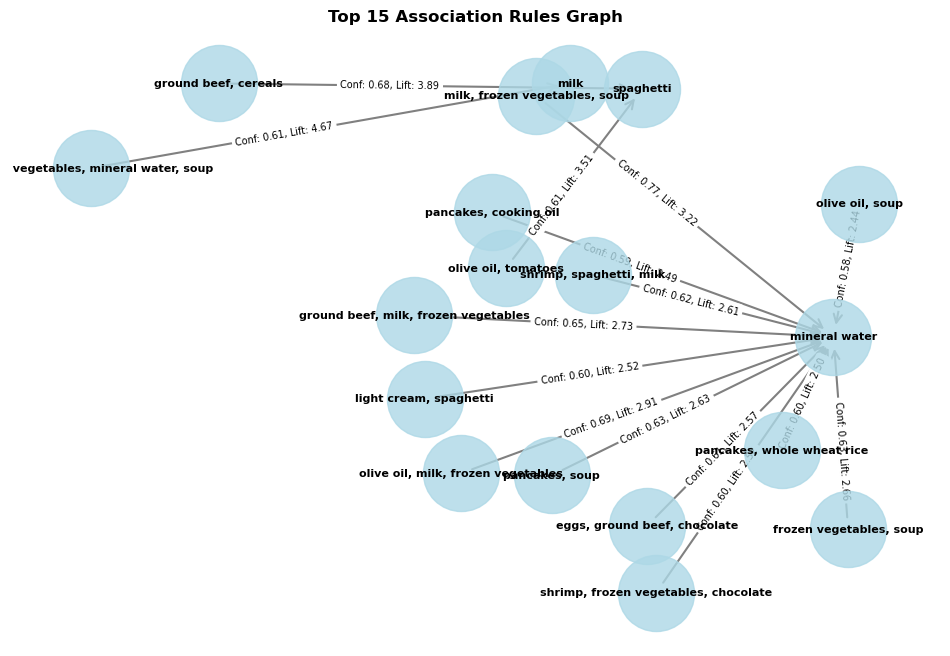

In [15]:
# --- Build the graph (show only top N strongest rules) ---
top_n = 15  # You can change this number
rules_sorted = rules.sort_values(by='confidence', ascending=False).head(top_n)

G = nx.DiGraph()  # Directed graph to show rule direction

for _, rule in rules_sorted.iterrows():
    antecedents = ", ".join(rule['antecedents'])
    consequents = ", ".join(rule['consequents'])
    confidence = rule['confidence']
    lift = rule['lift']
    label = f"Conf: {confidence:.2f}, Lift: {lift:.2f}"

    # Add nodes and edges
    G.add_node(antecedents, label=antecedents)
    G.add_node(consequents, label=consequents)
    G.add_edge(antecedents, consequents, weight=confidence, label=label)

# --- Visualization settings ---
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)  # Balanced layout

# Node & edge appearance
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=15, edge_color='gray', width=1.5)

# Edge labels (confidence + lift)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.4)

plt.title(f"Top {top_n} Association Rules Graph", fontsize=12, fontweight='bold')
plt.axis('off')
plt.show()
